# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [72]:
### Biovolume_per_site_class_and_depth.pkl - Contains biovolume data for each Profile_id and depth, separated into log-spaced size classes
#       - Column names indicate size classes from 0.2 to ~10 mm equivalent spherical diameter (ESD)
#       - Biovolume in mm³ per liter seawater
#       - Profile_id is always a string
#       - depth in dbar (approximately equal to depth in meters) starts at 12.5 dbar and increases in 25 dbar steps to 987.5 dbar (40 depth levels)
#       - depth_bin = integer from 0 to 39, indicating the depth level (0 = 12.5 dbar, 1 = 37.5 dbar, ..., 39 = 987.5 dbar)

BV_data = pd.read_pickle('../Data/Biovolume_per_size_class_and_depth.pkl')
BV_data.info()
BV_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Profile_id                             224520 non-null  object 
 1   depth                                  224520 non-null  float64
 2   depth_bin                              224520 non-null  int64  
 3   Biovolume [ppm] (ESD: 0.203-0.256 mm)  224520 non-null  float64
 4   Biovolume [ppm] (ESD: 0.256-0.323 mm)  224520 non-null  float64
 5   Biovolume [ppm] (ESD: 0.323-0.406 mm)  224520 non-null  float64
 6   Biovolume [ppm] (ESD: 0.406-0.512 mm)  224520 non-null  float64
 7   Biovolume [ppm] (ESD: 0.512-0.645 mm)  224520 non-null  float64
 8   Biovolume [ppm] (ESD: 0.645-0.813 mm)  224520 non-null  float64
 9   Biovolume [ppm] (ESD: 0.813-1.02 mm)   224520 non-null  float64
 10  Biovolume [ppm] (ESD: 1.02-1.29 mm)    224520 non-null  

,Profile_id,depth,depth_bin,Biovolume [ppm] (ESD: 0.203-0.256 mm),Biovolume [ppm] (ESD: 0.256-0.323 mm),Biovolume [ppm] (ESD: 0.323-0.406 mm),Biovolume [ppm] (ESD: 0.406-0.512 mm),Biovolume [ppm] (ESD: 0.512-0.645 mm),Biovolume [ppm] (ESD: 0.645-0.813 mm),Biovolume [ppm] (ESD: 0.813-1.02 mm),Biovolume [ppm] (ESD: 1.02-1.29 mm),Biovolume [ppm] (ESD: 1.29-1.63 mm),Biovolume [ppm] (ESD: 1.63-2.05 mm),Biovolume [ppm] (ESD: 2.05-2.58 mm),Biovolume [ppm] (ESD: 2.58-3.25 mm),Biovolume [ppm] (ESD: 3.25-4.1 mm),Biovolume [ppm] (ESD: 4.1-5.16 mm),Biovolume [ppm] (ESD: 5.16-6.5 mm),Biovolume [ppm] (ESD: 6.5-8.19 mm),Biovolume [ppm] (ESD: 8.19-10.3 mm)
0,0000a_WMO5906623_recovery_profiles,12.5,0,0.114562,0.104158,0.078780,0.066139,0.081787,0.062770,0.122905,0.036882,0.019573,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0000a_WMO5906623_recovery_profiles,37.5,1,0.136750,0.117453,0.113992,0.117148,0.142345,0.118748,0.115595,0.203758,0.142237,0.047568,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0000a_WMO5906623_recovery_profiles,62.5,2,0.127222,0.118740,0.134736,0.156787,0.177491,0.146157,0.145280,0.131664,0.024792,0.000000,0.197754,0.0,0.0,0.0,0.0,0.0,0.0
3,0000a_WMO5906623_recovery_profiles,87.5,3,0.175240,0.167346,0.235771,0.252304,0.290185,0.307278,0.273936,0.196201,0.248322,0.143855,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0000a_WMO5906623_recovery_profiles,112.5,4,0.126923,0.157563,0.205987,0.263124,0.378548,0.511686,0.522228,0.528398,0.478425,0.595710,0.245062,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
### Environmental_data_depth_resolved.pkl - Contains metadata for every Profile_id and depth: 
#       - Latitude, Longitude & datetime (identical for all depths of one Profile_id)
#       - 10 environmental variables from CopernicusMarine Services, interpolated to the sampling locations, times and depths
#       - distance_to_coast_km (calculated from Latitude & Longitude)
#       - MarineRegion (categorical variable, from MarineRegions shapefile)

env_data = pd.read_pickle('../Data/Environmental_data_depth_resolved.pkl')
# subset env_data to only contain Profile_ids present in BV_data
env_data_subset = env_data[env_data['Profile_id'].isin(BV_data['Profile_id'])]
env_data_subset.info()
env_data.info()
# save subsetted env_data for future use
env_data_subset.to_pickle('../Data/Environmental_data_depth_resolved_subset.pkl')

<class 'pandas.core.frame.DataFrame'>
Index: 224520 entries, 0 to 227839
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Profile_id            224520 non-null  object        
 1   Latitude              224520 non-null  float64       
 2   Longitude             224520 non-null  float64       
 3   datetime              224520 non-null  datetime64[ns]
 4   depth                 224520 non-null  float64       
 5   ph                    224520 non-null  float64       
 6   chl                   224520 non-null  float64       
 7   no3                   224520 non-null  float64       
 8   po4                   224520 non-null  float64       
 9   si                    224520 non-null  float64       
 10  o2                    224520 non-null  float64       
 11  fe                    224520 non-null  float64       
 12  phyc                  224520 non-null  float64       
 13  thet

In [74]:
# Profile_id_to_clusters.pkl - Contains mapping of Profile_id to cluster labels (KMeans clustering based on vertical patterns of environmental variables)
#        - total of 10 clusters with unequal number of Profile_ids in each cluster
cluster_mapping = pd.read_pickle('../Data/Profile_id_to_clusters.pkl')
cluster_mapping.info()
cluster_mapping.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profile_id  5613 non-null   object
 1   cluster     5613 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 65.9+ KB


,Profile_id,cluster
0,s033,8
1,s035,8
2,s034,8
3,s036,8
4,s037,3


In [75]:
import pandas as pd

# Number of samples = number of unique Profile_ids
num_samples = BV_data["Profile_id"].nunique()

# Number of features = 17 size classes x 40 depth levels per Profile_id
num_features = (BV_data.shape[1] - 3) * 40  # subtracting 3 for Profile_id and depth columns

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
BV_data.head()


Number of samples: 5613
Number of features: 680
Example data:


,Profile_id,depth,depth_bin,Biovolume [ppm] (ESD: 0.203-0.256 mm),Biovolume [ppm] (ESD: 0.256-0.323 mm),Biovolume [ppm] (ESD: 0.323-0.406 mm),Biovolume [ppm] (ESD: 0.406-0.512 mm),Biovolume [ppm] (ESD: 0.512-0.645 mm),Biovolume [ppm] (ESD: 0.645-0.813 mm),Biovolume [ppm] (ESD: 0.813-1.02 mm),Biovolume [ppm] (ESD: 1.02-1.29 mm),Biovolume [ppm] (ESD: 1.29-1.63 mm),Biovolume [ppm] (ESD: 1.63-2.05 mm),Biovolume [ppm] (ESD: 2.05-2.58 mm),Biovolume [ppm] (ESD: 2.58-3.25 mm),Biovolume [ppm] (ESD: 3.25-4.1 mm),Biovolume [ppm] (ESD: 4.1-5.16 mm),Biovolume [ppm] (ESD: 5.16-6.5 mm),Biovolume [ppm] (ESD: 6.5-8.19 mm),Biovolume [ppm] (ESD: 8.19-10.3 mm)
0,0000a_WMO5906623_recovery_profiles,12.5,0,0.114562,0.104158,0.078780,0.066139,0.081787,0.062770,0.122905,0.036882,0.019573,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0000a_WMO5906623_recovery_profiles,37.5,1,0.136750,0.117453,0.113992,0.117148,0.142345,0.118748,0.115595,0.203758,0.142237,0.047568,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0000a_WMO5906623_recovery_profiles,62.5,2,0.127222,0.118740,0.134736,0.156787,0.177491,0.146157,0.145280,0.131664,0.024792,0.000000,0.197754,0.0,0.0,0.0,0.0,0.0,0.0
3,0000a_WMO5906623_recovery_profiles,87.5,3,0.175240,0.167346,0.235771,0.252304,0.290185,0.307278,0.273936,0.196201,0.248322,0.143855,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0000a_WMO5906623_recovery_profiles,112.5,4,0.126923,0.157563,0.205987,0.263124,0.378548,0.511686,0.522228,0.528398,0.478425,0.595710,0.245062,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [76]:
# Check for missing values
missing_values = BV_data.isnull().sum()
print(missing_values)
## --> There are no missing data in our dataset


Profile_id                               0
depth                                    0
depth_bin                                0
Biovolume [ppm] (ESD: 0.203-0.256 mm)    0
Biovolume [ppm] (ESD: 0.256-0.323 mm)    0
Biovolume [ppm] (ESD: 0.323-0.406 mm)    0
Biovolume [ppm] (ESD: 0.406-0.512 mm)    0
Biovolume [ppm] (ESD: 0.512-0.645 mm)    0
Biovolume [ppm] (ESD: 0.645-0.813 mm)    0
Biovolume [ppm] (ESD: 0.813-1.02 mm)     0
Biovolume [ppm] (ESD: 1.02-1.29 mm)      0
Biovolume [ppm] (ESD: 1.29-1.63 mm)      0
Biovolume [ppm] (ESD: 1.63-2.05 mm)      0
Biovolume [ppm] (ESD: 2.05-2.58 mm)      0
Biovolume [ppm] (ESD: 2.58-3.25 mm)      0
Biovolume [ppm] (ESD: 3.25-4.1 mm)       0
Biovolume [ppm] (ESD: 4.1-5.16 mm)       0
Biovolume [ppm] (ESD: 5.16-6.5 mm)       0
Biovolume [ppm] (ESD: 6.5-8.19 mm)       0
Biovolume [ppm] (ESD: 8.19-10.3 mm)      0
dtype: int64


In [77]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


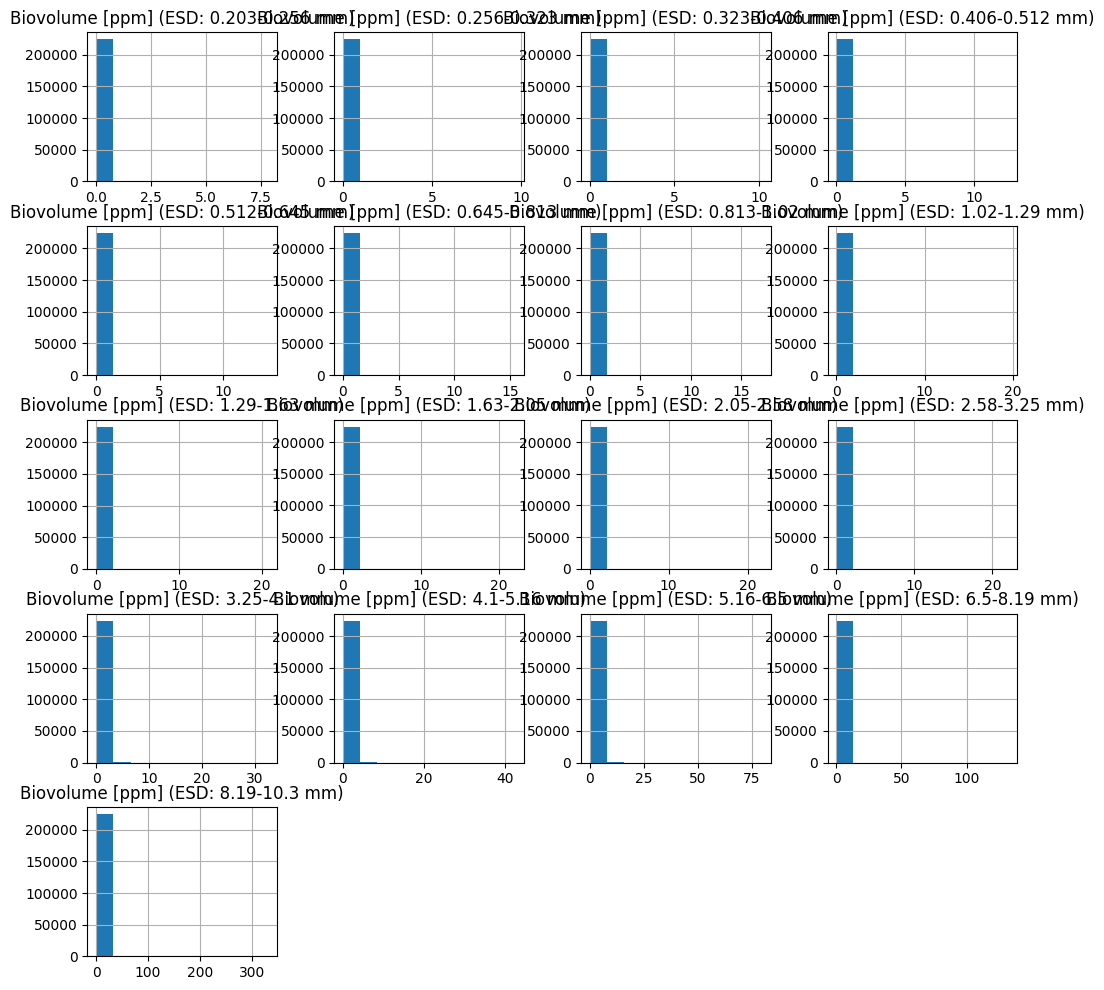

In [78]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [79]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


<Axes: xlabel='cluster', ylabel='count'>

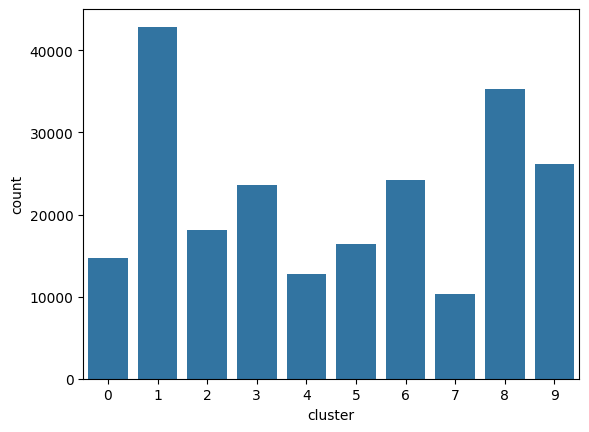

In [92]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE   :   Counts of cluster mappings across the subset of environment measurements.           #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

cluster_merge_subset = env_data_subset.merge(cluster_mapping, on='Profile_id')
cluster_merge_subset.head()
sns.countplot(x='cluster', data=cluster_merge_subset)

### Target Class Biases

There are **10 classes** in total, each cluster corresponds to one of these target classes.  
We observe an imbalanced distribution of measurements across the respective classes.

**The table below shows**;
The class counts in this subset range from **10,360** to **42,880**, which appears rather substantial.

In [81]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE   :   List of cluster counts across the subset of environment measurements.               #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
class_occurances = cluster_merge_subset['cluster'].value_counts()
class_df = class_occurances.to_frame(name='count').reset_index()
class_df

,cluster,count
0,1,42880
1,8,35320
2,9,26160
3,6,24240
4,3,23600
5,2,18080
6,5,16440
7,0,14680
8,4,12760
9,7,10360


### Target Variable Biases

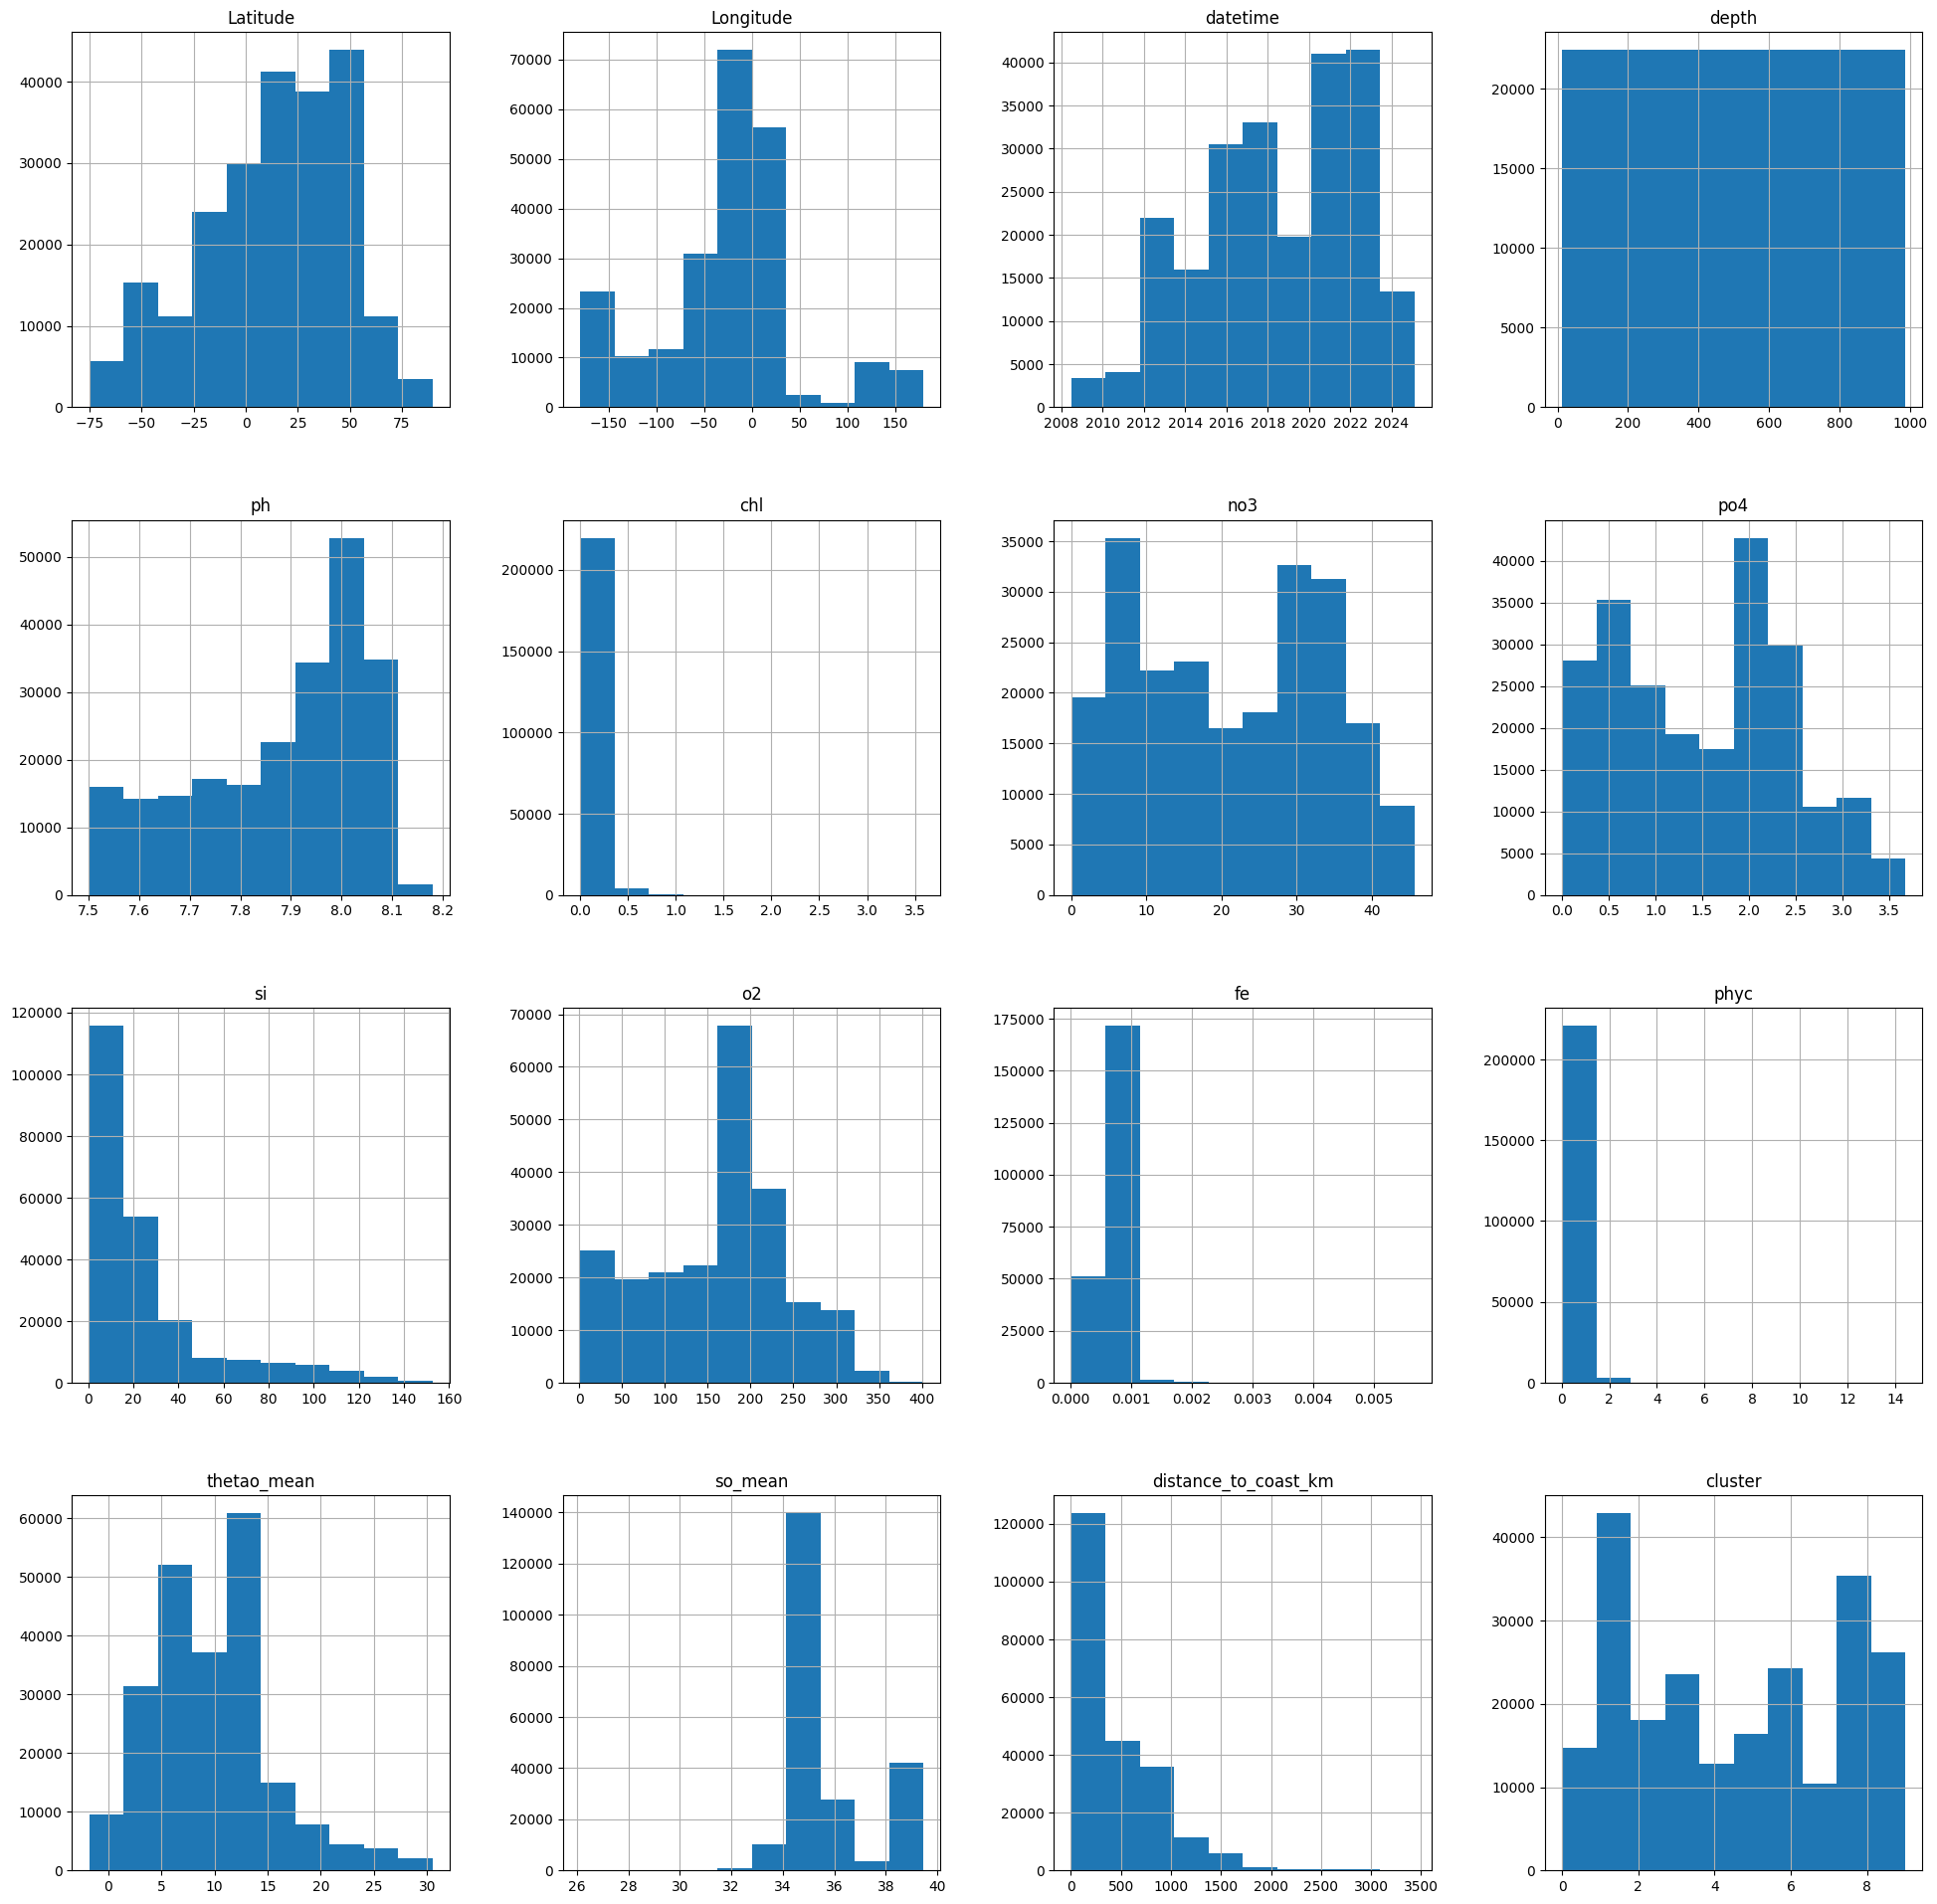

In [ ]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#                   EXPLORE   :   Individual target variables and their distribution.                     #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

cluster_merge_subset.hist(figsize=(24, 24))
plt.show()

### Time-series evaluation of biases in sampling time and geographic dispersion.

<Axes: xlabel='month', ylabel='year'>

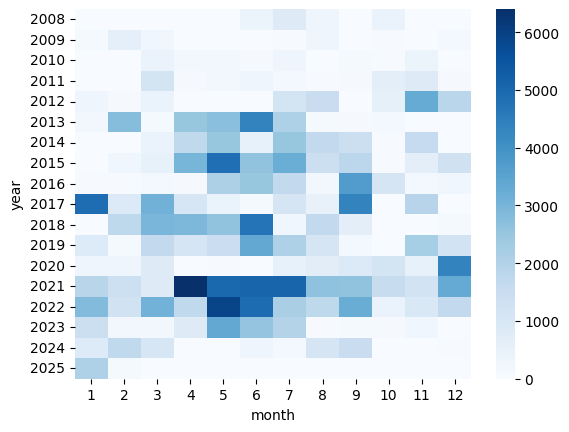

In [83]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       Explore :    Imbalances in measurement dates across study years.                                  #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
cluster_merge_subset['year'] = cluster_merge_subset['datetime'].dt.year
cluster_merge_subset['month'] = cluster_merge_subset['datetime'].dt.month

heat = cluster_merge_subset.groupby(['year', 'month']).size().unstack(fill_value=0)
sns.heatmap(heat, cmap='Blues')

#### Number of samples per year and month

This heatmap shows how sampling effort and model coverage vary across time. Darker cells represent months with a high number of available data points (either measured or modeled), while lighter areas indicate sparse or missing coverage. The plot highlights strong temporal heterogeneity: intensive coverage appears especially in 2021–2022, whereas earlier years and winter months contain far fewer data points.

In [84]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE :   Geographic distribution and site imbalance of sample records.                         #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

df_merge = cluster_merge_subset.copy()
df_merge['year'] = df_merge['datetime'].dt.year
df_merge['month'] = df_merge['datetime'].dt.month

#### Latitudinal vs. longitudinal standard deviation

**These two heatmaps illustrate how spatially dispersed the samples were in each month and year.**

- The latitudinal standard deviation reflects how spread out the sampling was in the North–South direction. Higher values indicate that samples came from widely separated latitudes, suggesting sampling across multiple basins or depth gradients.

- The longitudinal standard deviation measures spatial spread in the East–West direction. High values here indicate sampling across geographically distant regions, often spanning different oceanic or coastal areas.

**Comparing the two plots**:
You can see that certain periods exhibit stronger dispersion in latitude (e.g., 2018, 2020–2023), while others show greater dispersion in longitude (e.g., 2014, 2021–2023). This difference suggests shifts in sampling strategy or geographic focus. For example, months with high latitudinal but low longitudinal variation likely represent north–south transects, while the opposite pattern indicates east–west sampling campaigns. Together, the plots highlight how spatial sampling bias varies over time and direction.

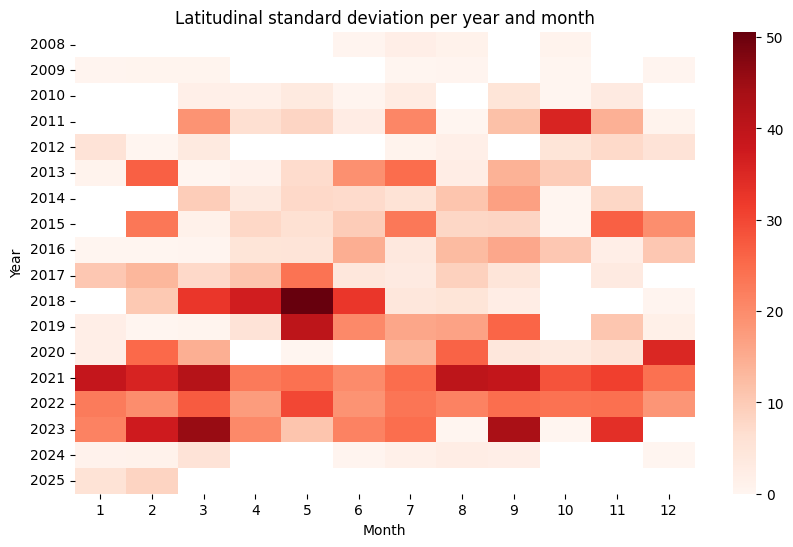

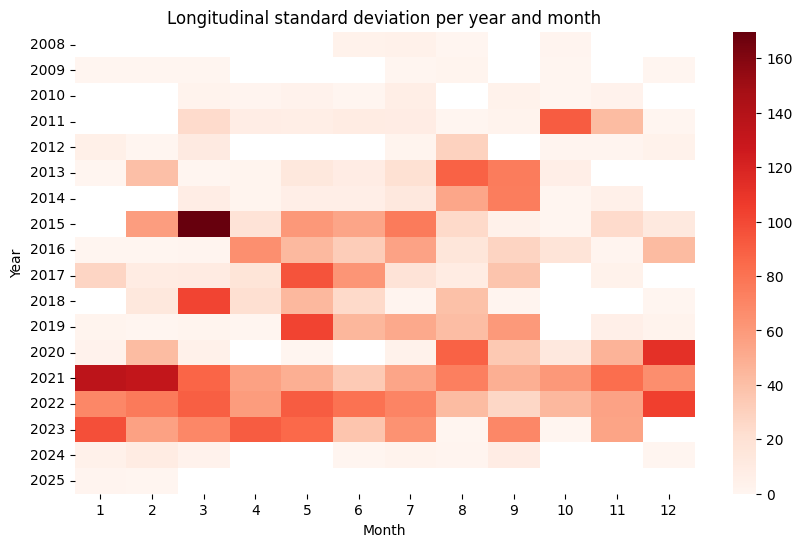

In [85]:
lat_stats = (
    df_merge
    .groupby(['year', 'month'])['Latitude']
    .agg(['min', 'max', 'std'])
)
lon_stats = (
    df_merge
    .groupby(['year', 'month'])['Longitude']
    .agg(['min', 'max', 'std'])
)

lat_range = (lat_stats['max'] - lat_stats['min']).unstack(fill_value=0)
lon_range = (lon_stats['max'] - lon_stats['min']).unstack(fill_value=0)

lat_std = lat_stats['std'].unstack()
lon_std = lon_stats['std'].unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(lat_std, cmap='Reds')
plt.title('Latitudinal standard deviation per year and month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(lon_std, cmap='Reds')
plt.title('Longitudinal standard deviation per year and month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


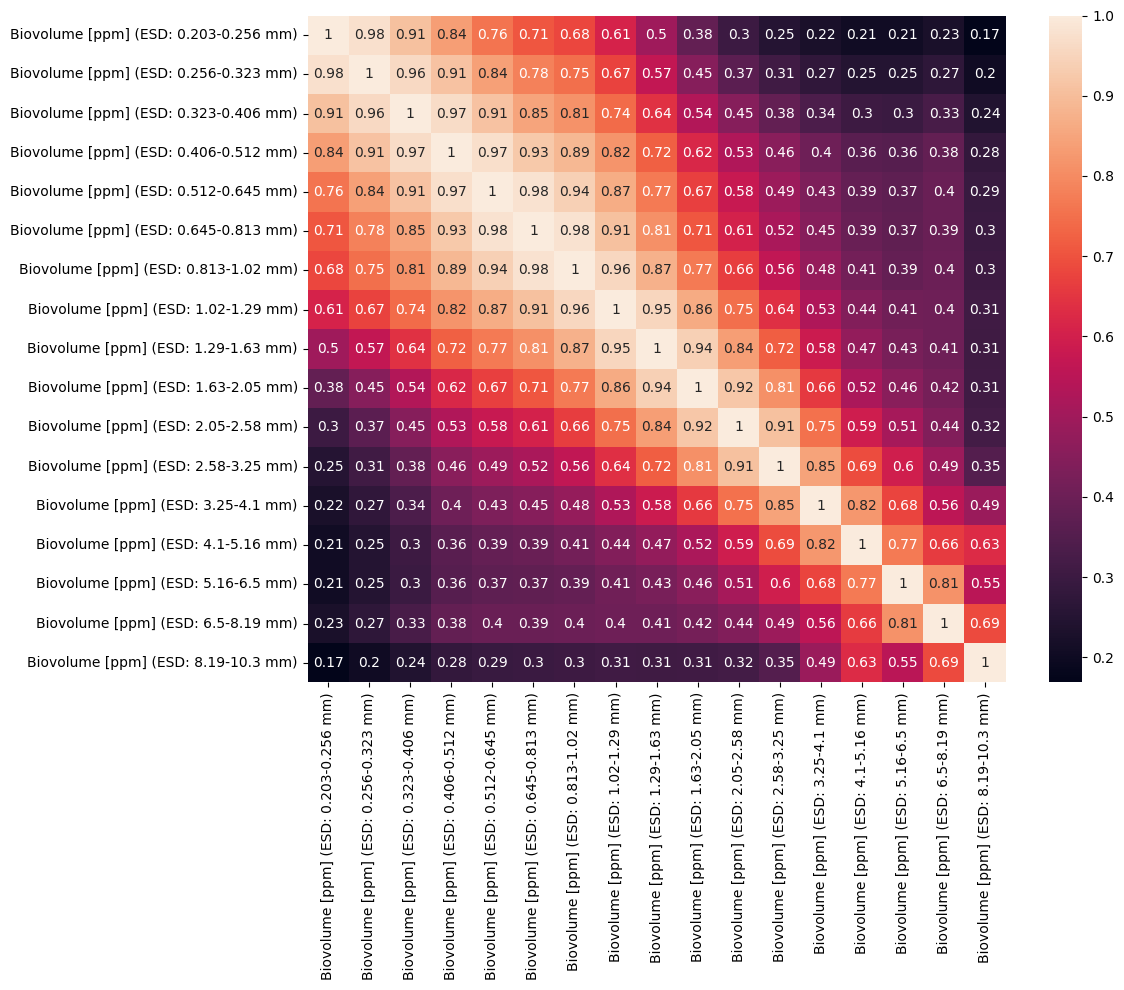

In [86]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(12, 10))
df = BV_data #Create a dataframe that only contains numerical values
df = df.drop(columns=['Profile_id', "depth", "depth_bin"]) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# --> The Biovolume of sizeclasses that are closely related have a high correlation, but the biovolume of very small and very large particle sizes is only poorly correlated
# --> All values are positievly correlated. There is no negative correlation


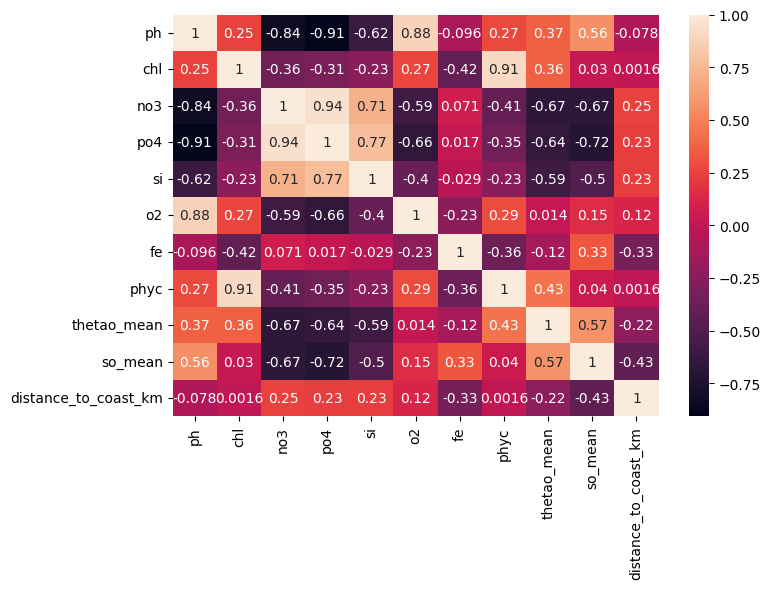

In [87]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(8, 6))
df2 = env_data_subset #Create a dataframe that only contains numerical values
df2 = df2.drop(columns=["Profile_id", "Latitude", "Longitude", "datetime", "depth", "MarineRegion"]) 
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# In the target values there is high correlation (>0.7) between:
# ph & o2; chl & phyc; po4 & no3; si & no3; si & po4
# There is high anticorrelation (<-0.7) between:
# ph & no3; ph & po4; po4 & so_mean; 


In [88]:
# merge datasets due to their profile Id and their depth to see whether there are any correlations between biovolume (feature data) and environmental data (target data)
merged_df = pd.merge(
    BV_data, env_data_subset, 
    on=['Profile_id', 'depth'],  # Schlüsselspalten
    how='left'                   # 'left', 'right', 'inner' oder 'outer'
)
#merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Profile_id                             224520 non-null  object        
 1   depth                                  224520 non-null  float64       
 2   depth_bin                              224520 non-null  int64         
 3   Biovolume [ppm] (ESD: 0.203-0.256 mm)  224520 non-null  float64       
 4   Biovolume [ppm] (ESD: 0.256-0.323 mm)  224520 non-null  float64       
 5   Biovolume [ppm] (ESD: 0.323-0.406 mm)  224520 non-null  float64       
 6   Biovolume [ppm] (ESD: 0.406-0.512 mm)  224520 non-null  float64       
 7   Biovolume [ppm] (ESD: 0.512-0.645 mm)  224520 non-null  float64       
 8   Biovolume [ppm] (ESD: 0.645-0.813 mm)  224520 non-null  float64       
 9   Biovolume [ppm] (ESD: 0.813-1.02 mm)   224520 no

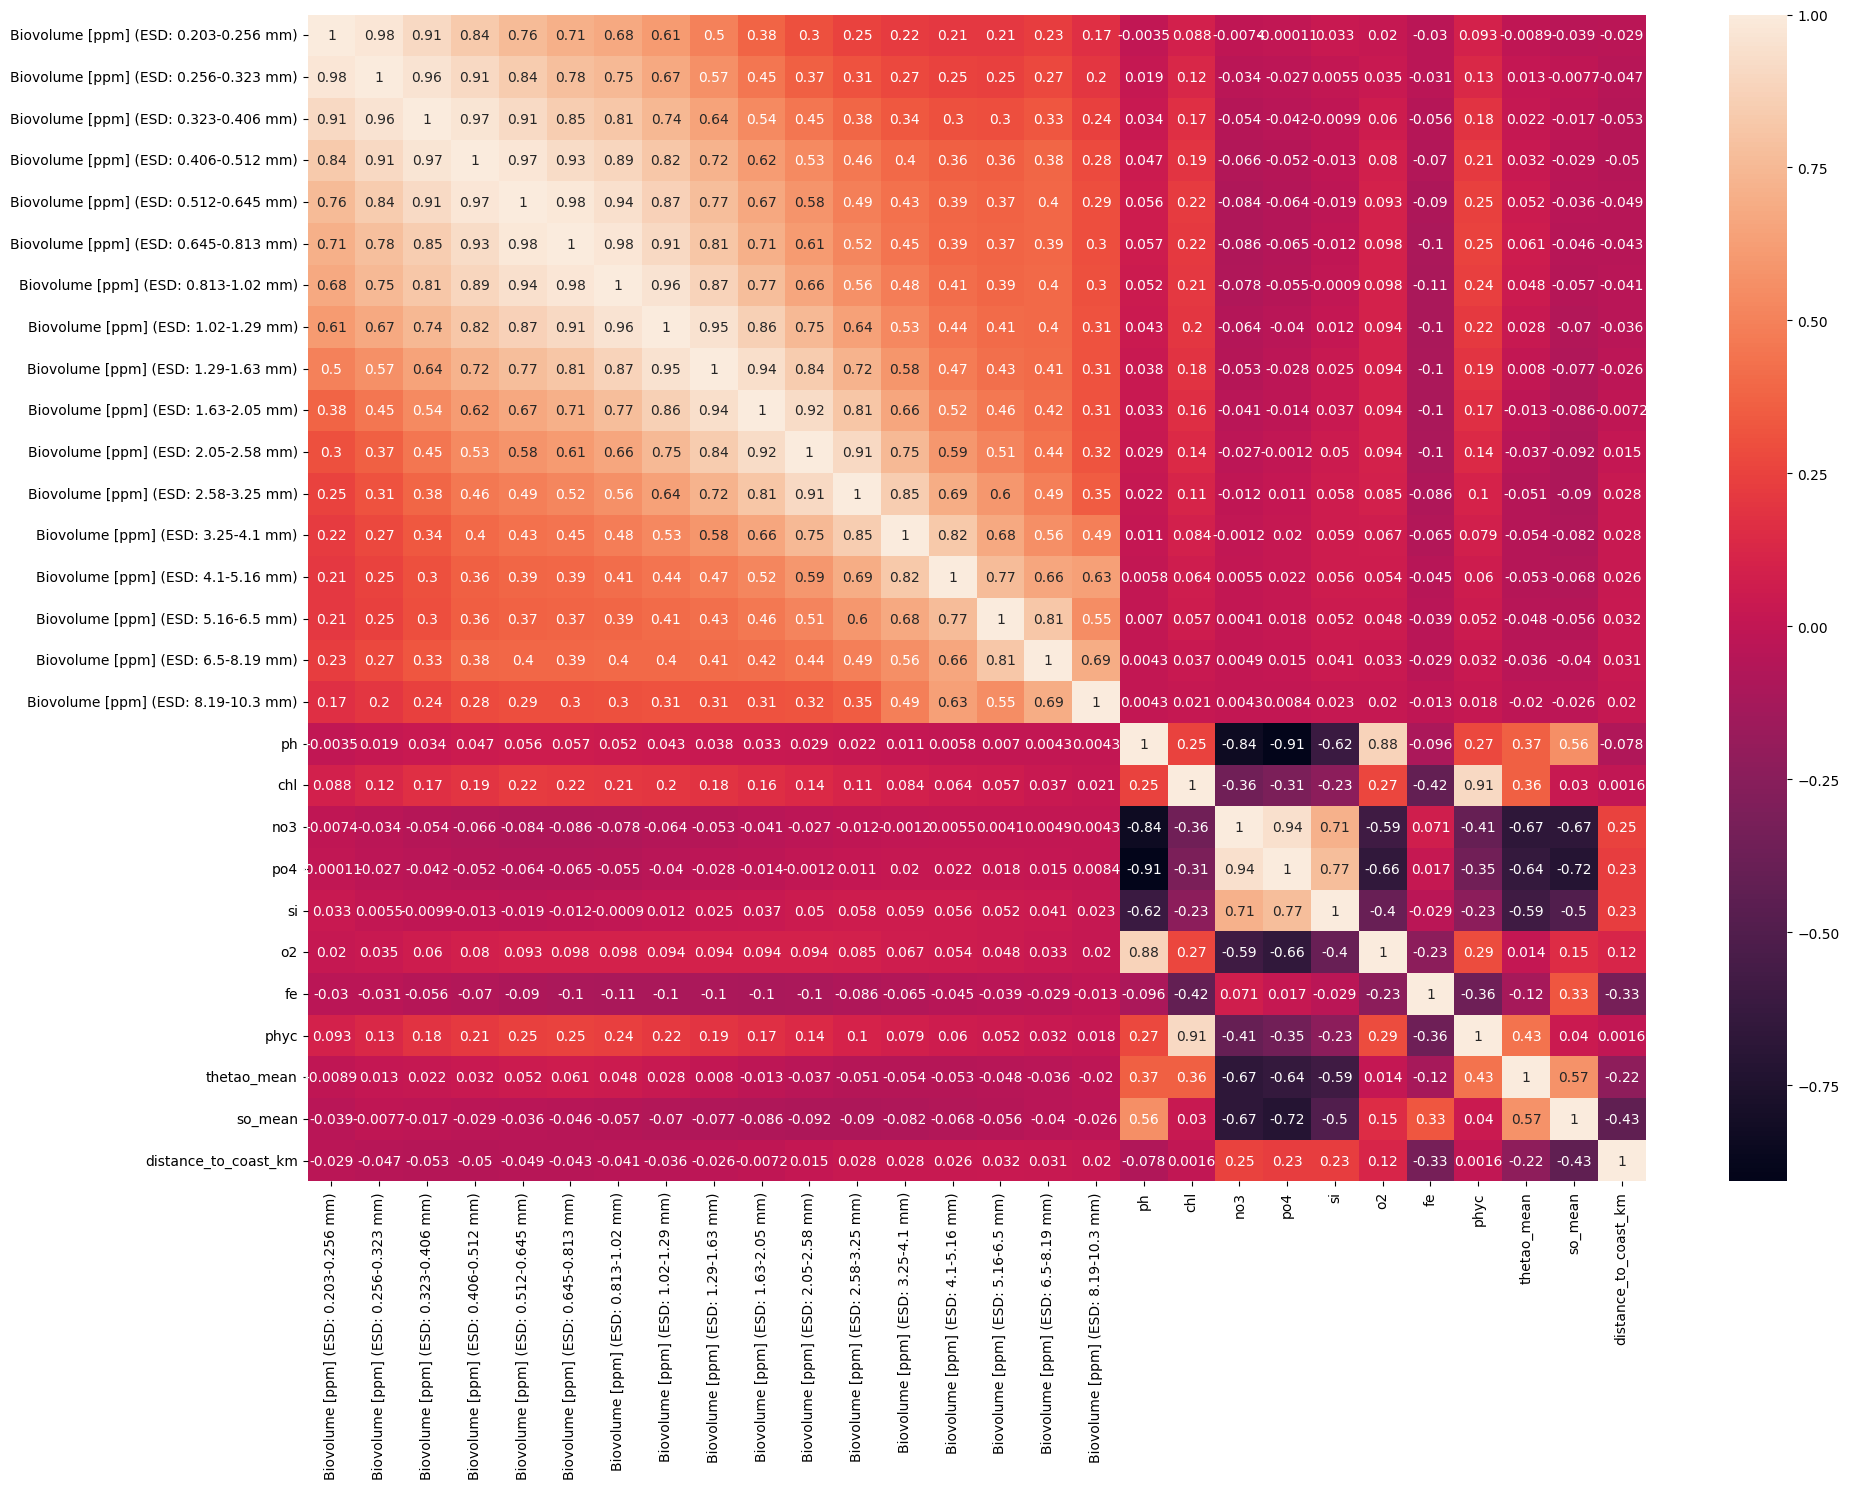

In [89]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(20, 15))
merged_df = merged_df.drop(columns=['Profile_id', "depth", "depth_bin", "Latitude", "Longitude", "datetime", "MarineRegion"]) 
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# --> No real correlation between Biovolume (feature data) and environmental data (target data)


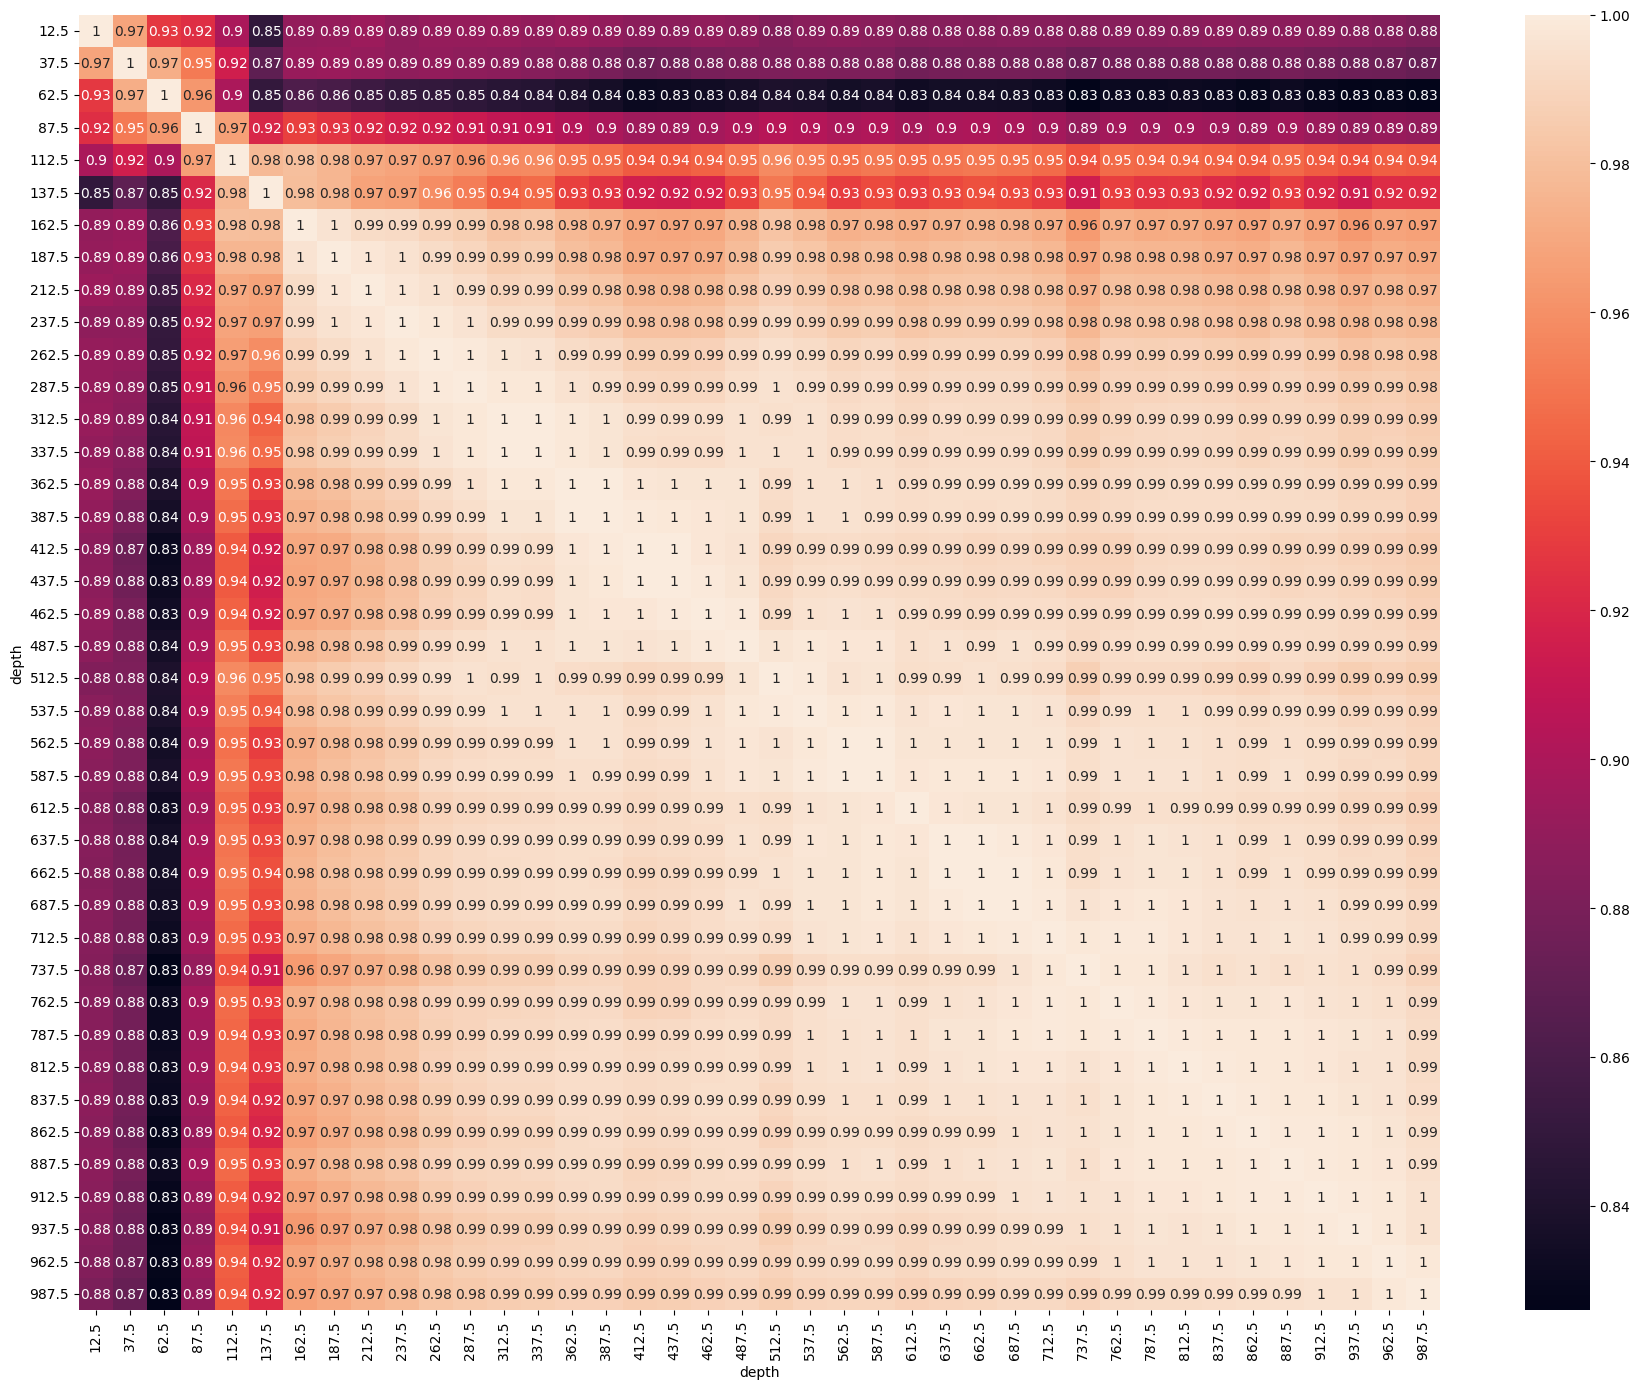

In [90]:
# Determine how biovolume values in each depth layer correlate with the biovolume data of the other depth layers
biovolume_cols = [col for col in BV_data.columns if 'Biovolume' in col]

plt.figure(figsize=(18, 14))
# Pivotieren: Profile_id bleibt Index, depth wird zu Spalten
df_pivot = BV_data.pivot(index='Profile_id', columns='depth', values=biovolume_cols[0])
corr_depths = df_pivot.corr()  
sns.heatmap(corr_depths, annot=True)
plt.tight_layout()
plt.show()
# --> The results show that there is a very high correlation between depth. Has one biovolume class a high value in 12.5m it also has a high value in 100m, etc. 